In [1]:
from models.classification_model import ClassifierModel # class with classifiers
from models.reduce_model import ReduceModel # class with autoencoder

import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import joblib
from copy import deepcopy

# plt.rcParams['text.usetex'] = True

In [2]:
dataset = pd.read_csv("preprocessing/datasets/main_dataset.csv", index_col=0)
target = pd.read_csv("preprocessing/datasets/main_target.csv", index_col=0)

In [3]:
reduce_model = joblib.load("models/best/reduce_model.pkl")
c_model = joblib.load("models/best/c_model.pkl")

In [4]:
main_reduced = reduce_model.transform(dataset)

In [5]:
def clf_per_seed(n=10, metric = ClassifierModel.score):
    clfs = deepcopy(c_model)
    result = {name: [0.]*n for name in clfs.models}
    result["Median"] = [0.]*n
    for seed in range(0, n):
        X_train, X_test, y_train, y_test = train_test_split(
        main_reduced, target.values.ravel(), test_size=0.2, random_state=seed,
        #stratify=target.values.ravel()
        )
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        for clf in clfs.models:
            clfs.models[clf].fit(X_train, y_train)
            result[clf][seed] = metric(y_test, clfs.models[clf].predict(X_test))
        result["Median"][seed] = metric(y_test, np.ones_like(y_test)*np.median(y_test))
    
    
    return result
    

In [6]:
r = pd.DataFrame(clf_per_seed(100))
print(r.mean())
print(r.std())

CatBoost    0.614968
RF          0.646686
AdaBoost    0.620275
kNN         0.699237
Median      0.294863
dtype: float64
CatBoost    0.132043
RF          0.126474
AdaBoost    0.130107
kNN         0.120785
Median      0.034460
dtype: float64


CatBoost    0.614968
RF          0.646686
AdaBoost    0.620275
kNN         0.699237
Median      0.294863
dtype: float64
CatBoost    0.132043
RF          0.126474
AdaBoost    0.130107
kNN         0.120785
Median      0.034460
dtype: float64


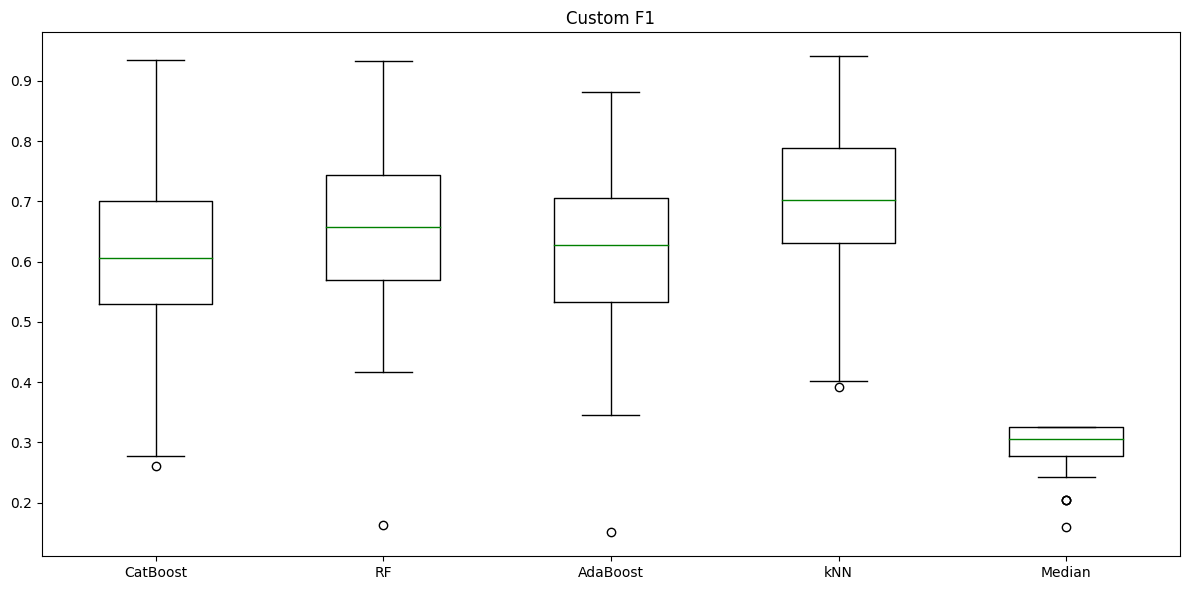

In [7]:
plt.figure(figsize=(12, 6))
print(r.mean())
print(r.std())
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )



plt.title("Custom F1")
plt.tight_layout()
plt.show()

CatBoost    0.670588
RF          0.677059
AdaBoost    0.651176
kNN         0.729412
Median      0.601176
dtype: float64
CatBoost    0.106744
RF          0.106578
AdaBoost    0.113798
kNN         0.102399
Median      0.070241
dtype: float64


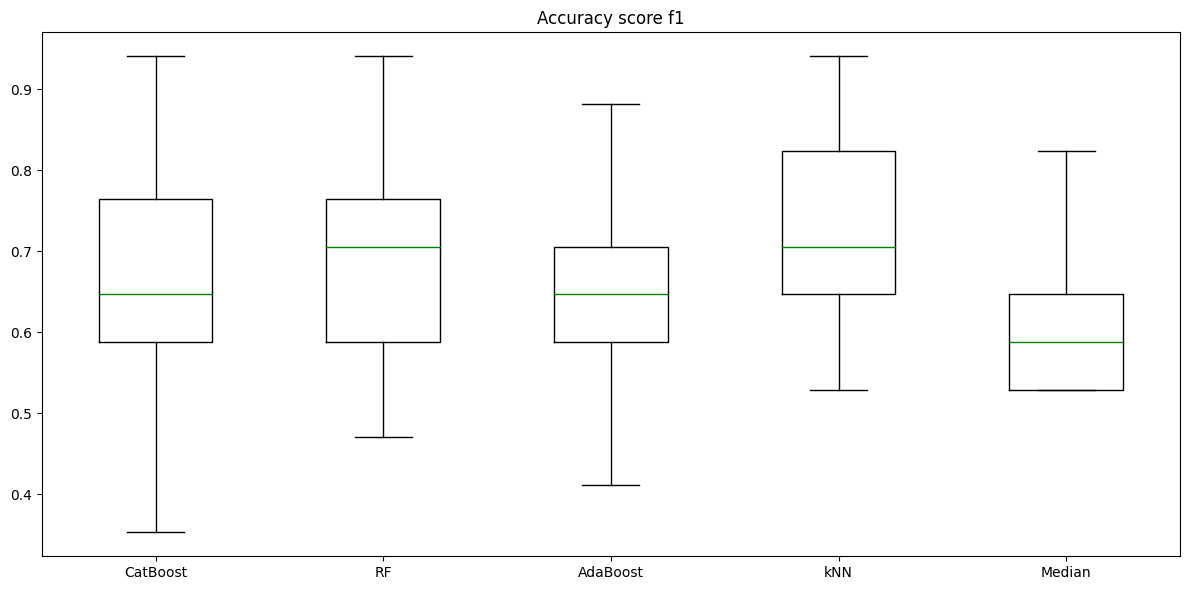

In [8]:
r = pd.DataFrame(clf_per_seed(100, lambda y_t, y_p: metrics.accuracy_score(y_t, y_p)))
print(r.mean())
print(r.std())
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )
plt.title("Accuracy score f1")
plt.tight_layout()
plt.show()

CatBoost    0.633987
RF          0.661191
AdaBoost    0.635004
kNN         0.713016
Median      0.374304
dtype: float64
CatBoost    0.120222
RF          0.114646
AdaBoost    0.120524
kNN         0.110450
Median      0.026631
dtype: float64


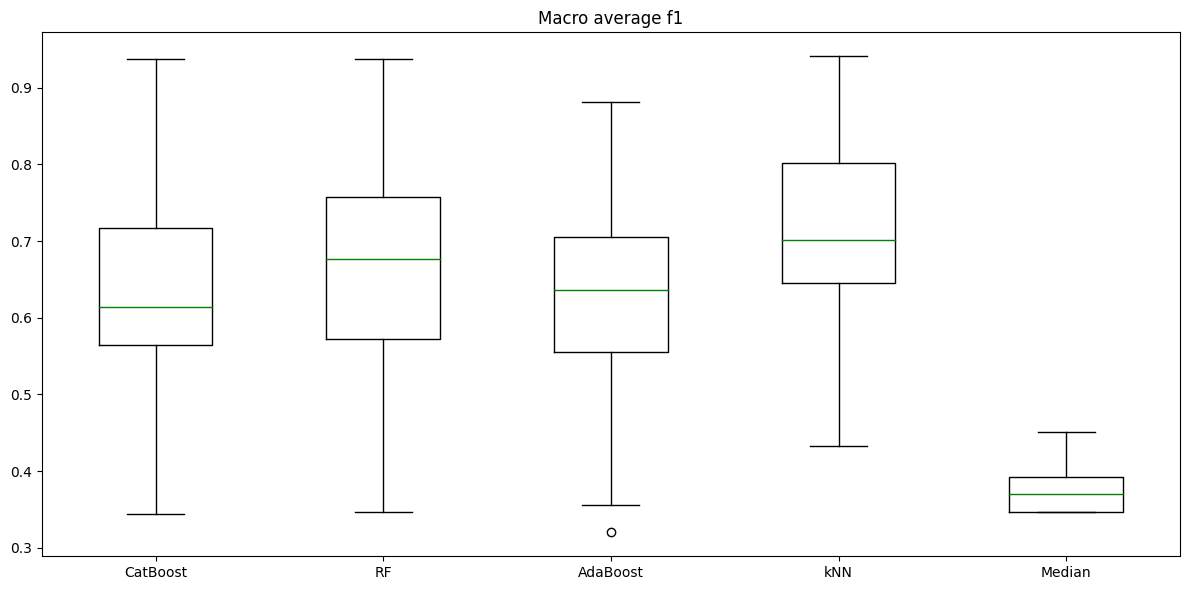

In [16]:
r = pd.DataFrame(clf_per_seed(100, lambda y_t, y_p: metrics.f1_score(y_t, y_p, average="macro")))
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )
print(r.mean())
print(r.std())
plt.title("Macro average f1")
plt.tight_layout()
plt.show()

CatBoost    0.735146
RF          0.706968
AdaBoost    0.675845
kNN         0.758739
Median      0.541927
dtype: float64
CatBoost    0.099036
RF          0.107584
AdaBoost    0.122148
kNN         0.106206
Median      0.342453
dtype: float64


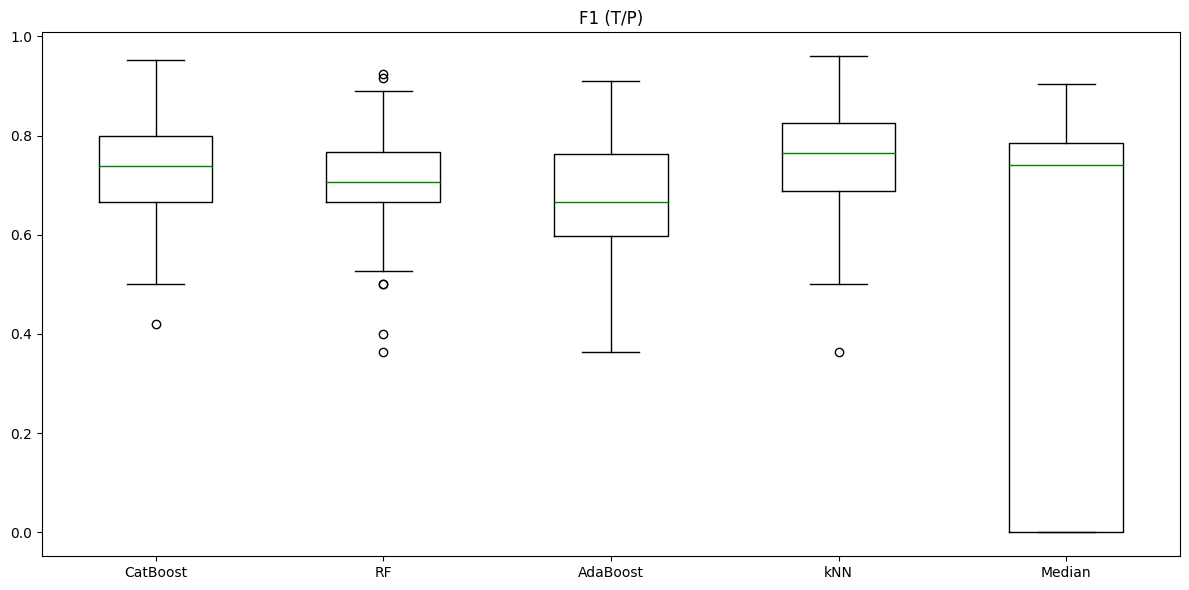

In [10]:
r = pd.DataFrame(clf_per_seed(100, lambda y_t, y_p: metrics.f1_score(y_t, y_p, pos_label=1)))
print(r.mean())
print(r.std())
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )
plt.title("F1 (T/P)")
plt.tight_layout()
plt.show()

CatBoost    0.532827
RF          0.615414
AdaBoost    0.594163
kNN         0.667293
Median      0.206681
dtype: float64
CatBoost    0.174181
RF          0.153929
AdaBoost    0.157667
kNN         0.144177
Median      0.334422
dtype: float64


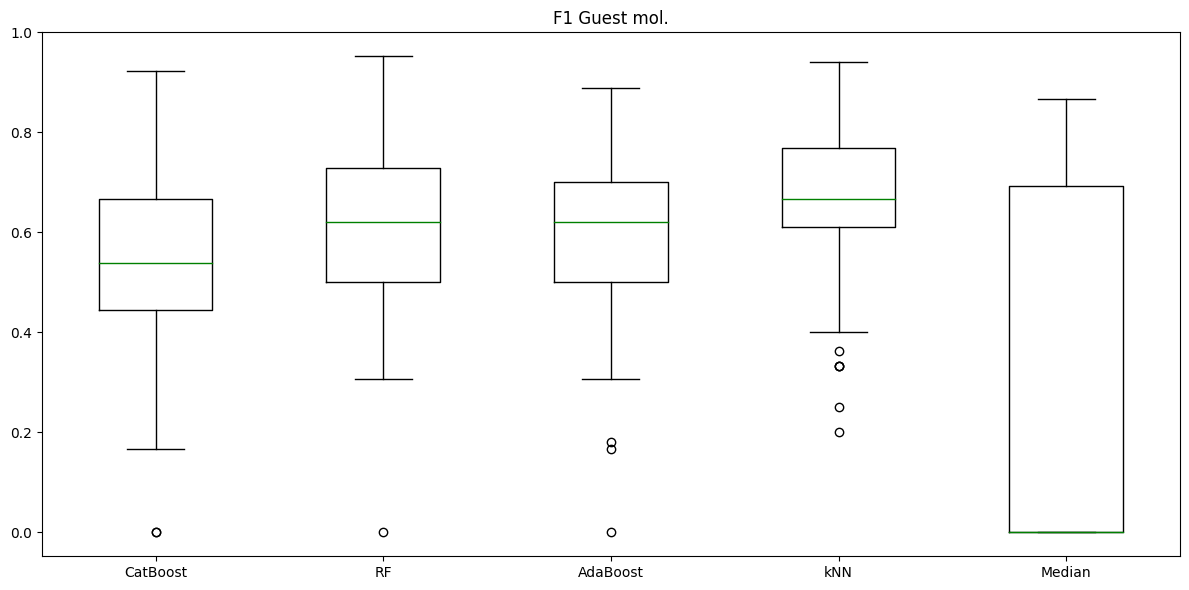

In [11]:
r = pd.DataFrame(clf_per_seed(100, lambda y_t, y_p: metrics.f1_score(y_t, y_p, pos_label=0)))
print(r.mean())
print(r.std())
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )
plt.title("F1 Guest mol.")
plt.tight_layout()
plt.show()

C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

CatBoost    0.694372
RF          0.679230
AdaBoost    0.652772
kNN         0.732837
Median      0.300588
dtype: float64
CatBoost    0.128793
RF          0.110153
AdaBoost    0.119759
kNN         0.105509
Median      0.035120
dtype: float64


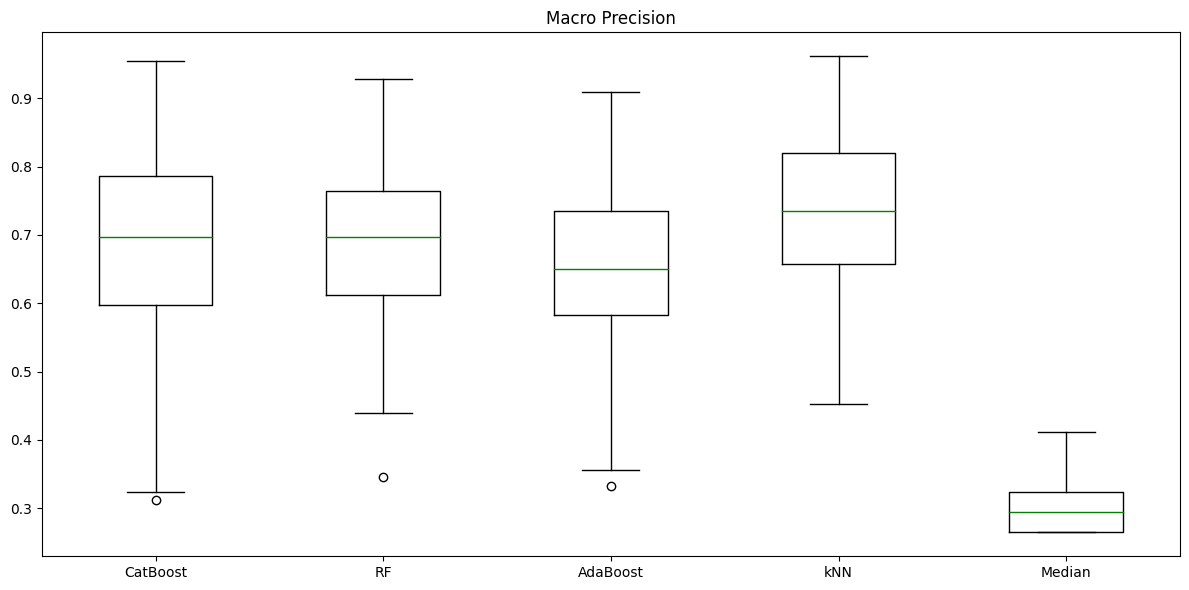

In [12]:
r = pd.DataFrame(clf_per_seed(100, lambda y_t, y_p: metrics.precision_score(y_t, y_p, average="macro")))
print(r.mean())
print(r.std())
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )
plt.title("Macro Precision")
plt.tight_layout()
plt.show()

C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

CatBoost    0.728579
RF          0.650382
AdaBoost    0.618791
kNN         0.729990
Median      0.164706
dtype: float64
CatBoost    0.246066
RF          0.181342
AdaBoost    0.184736
kNN         0.169723
Median      0.268329
dtype: float64


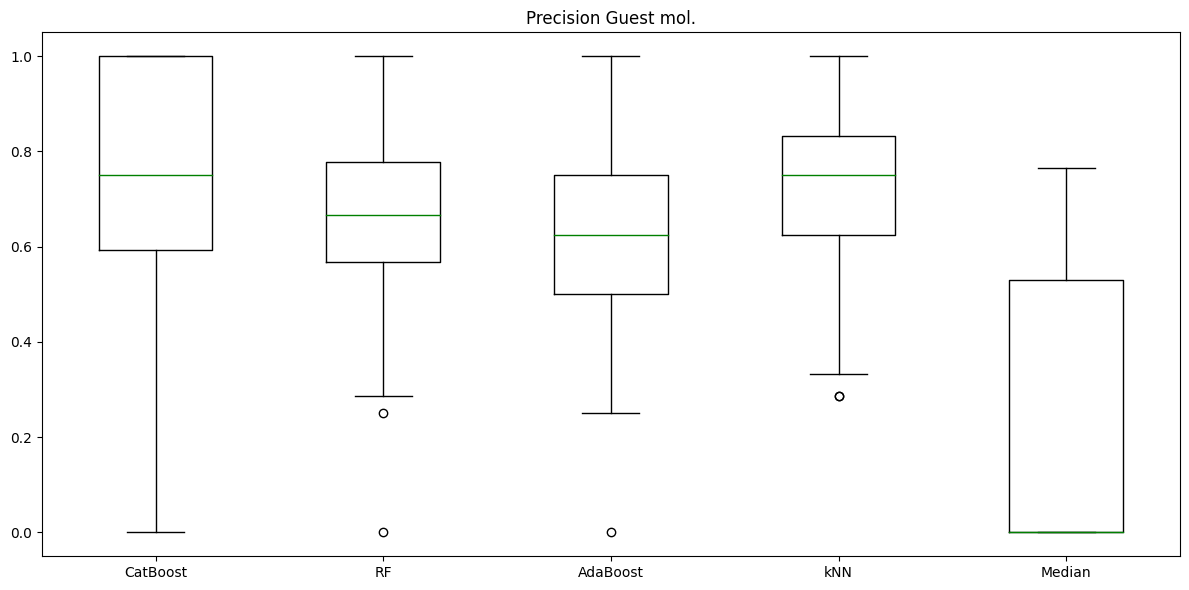

In [13]:
r = pd.DataFrame(clf_per_seed(100, lambda y_t, y_p: metrics.precision_score(y_t, y_p, pos_label=0)))
print(r.mean())
print(r.std())
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )
plt.title("Precision Guest mol.")
plt.tight_layout()
plt.show()

CatBoost    0.658092
RF          0.676319
AdaBoost    0.650553
kNN         0.726132
Median      0.500000
dtype: float64
CatBoost    0.102214
RF          0.110455
AdaBoost    0.117032
kNN         0.103344
Median      0.000000
dtype: float64


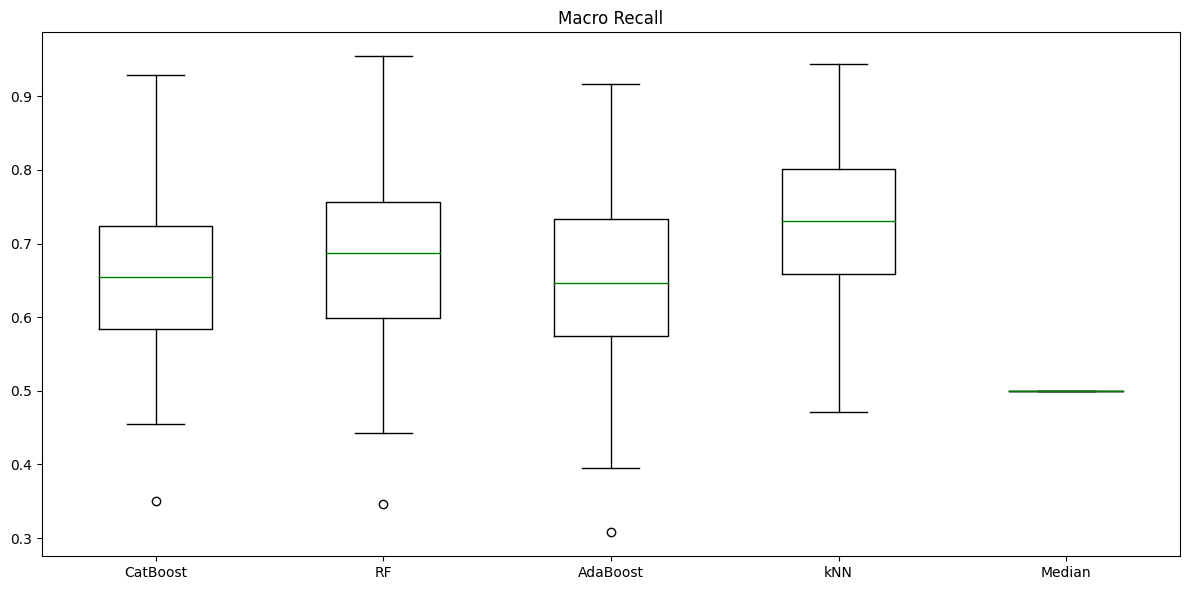

In [13]:
r = pd.DataFrame(clf_per_seed(100, lambda y_t, y_p: metrics.recall_score(y_t, y_p, average="macro")))
print(r.mean())
print(r.std())
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )
plt.title("Macro Recall")
plt.tight_layout()
plt.show()

CatBoost    0.454133
RF          0.619426
AdaBoost    0.608179
kNN         0.644521
Median      0.280000
dtype: float64
CatBoost    0.176654
RF          0.187035
AdaBoost    0.191774
kNN         0.175127
Median      0.451261
dtype: float64


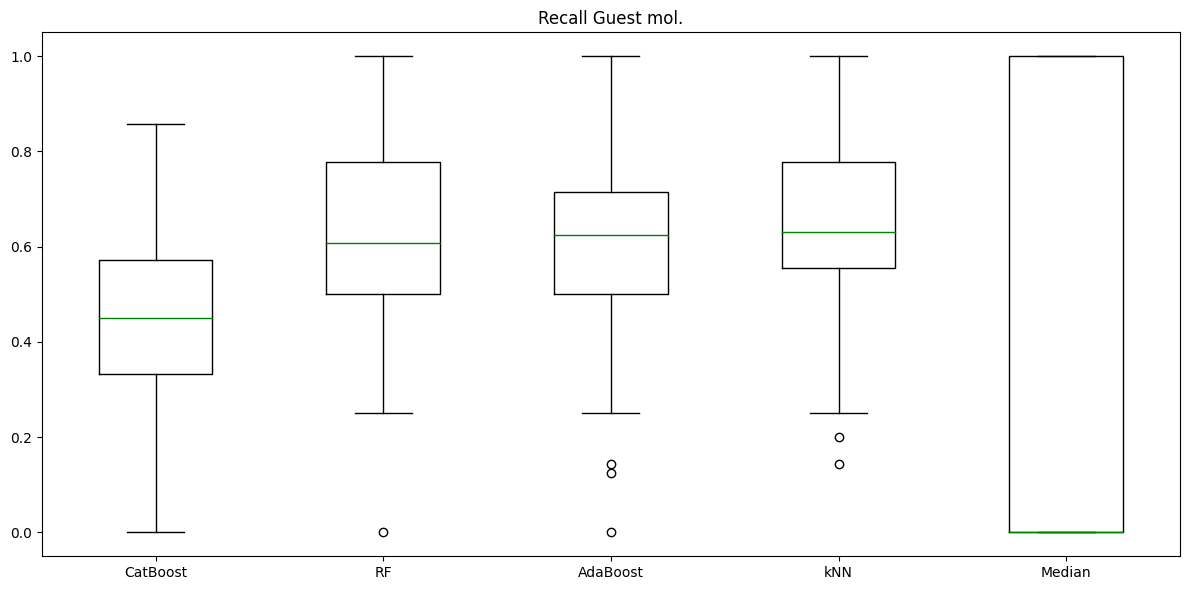

In [15]:
r = pd.DataFrame(clf_per_seed(100, lambda y_t, y_p: metrics.recall_score(y_t, y_p, pos_label=0)))
print(r.mean())
print(r.std())
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )
plt.title("Recall Guest mol.")
plt.tight_layout()
plt.show()

CatBoost    0.312984
RF          0.340319
AdaBoost    0.290013
kNN         0.441277
Median      0.000000
dtype: float64
CatBoost    0.208748
RF          0.217548
AdaBoost    0.228611
kNN         0.207538
Median      0.000000
dtype: float64


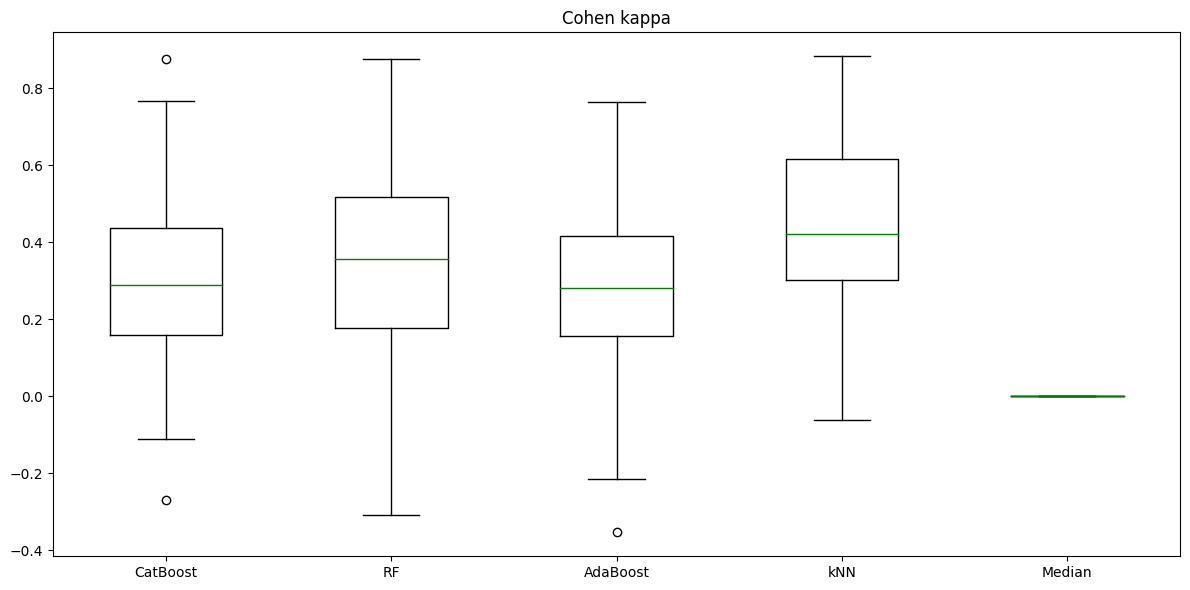

In [14]:
r = pd.DataFrame(clf_per_seed(100, lambda y_t, y_p: metrics.cohen_kappa_score(y_t, y_p)))
print(r.mean())
print(r.std())
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="k"),
            )
plt.title("Cohen kappa")
plt.tight_layout()
plt.show()

In [17]:
print(r.mean())
print(r.std())

CatBoost    0.312984
RF          0.340319
AdaBoost    0.290013
kNN         0.441277
Median      0.000000
dtype: float64
CatBoost    0.208748
RF          0.217548
AdaBoost    0.228611
kNN         0.207538
Median      0.000000
dtype: float64


In [18]:
def roc_auc_per_seed(n=10):
    clfs = deepcopy(c_model)
    result = {name: [0.]*n for name in clfs.models}
    for seed in range(0, n):
        X_train, X_test, y_train, y_test = train_test_split(
            main_reduced, target.values.ravel(), test_size=0.2, random_state=seed,
            #stratify=target.values.ravel()
            )
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        for clf in clfs.models:
            clfs.models[clf].fit(X_train, y_train)
            pred_proba = clfs.models[clf].predict_proba(X_test)
            fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba[:,1])
            auc = metrics.auc(fpr, tpr)
            result[clf][seed] = auc

    return result

CatBoost    0.737016
RF          0.769305
AdaBoost    0.696770
kNN         0.810614
dtype: float64
CatBoost    0.136392
RF          0.106603
AdaBoost    0.127858
kNN         0.111387
dtype: float64


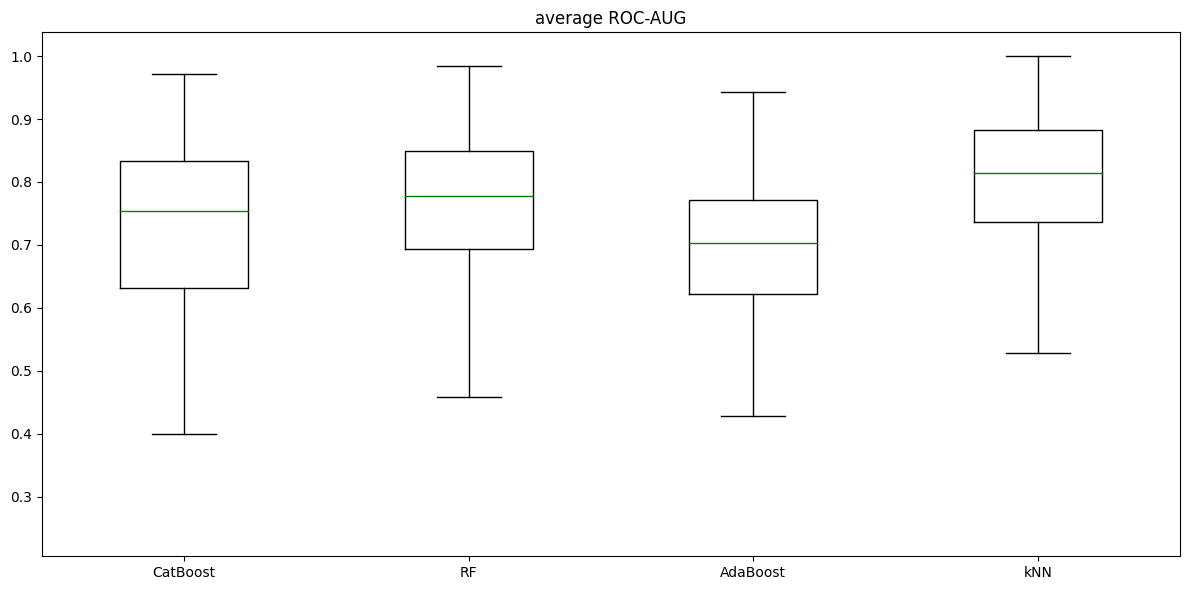

In [19]:
r = pd.DataFrame(roc_auc_per_seed(100))
print(r.mean())
print(r.std())
plt.figure(figsize=(12, 6))
plt.boxplot(r.values, labels=r.columns,
            boxprops=dict(color="k"),
            capprops=dict(color="k"),
            whiskerprops=dict(color="k"),
            medianprops=dict(color="g"),
            flierprops=dict(color="k", markeredgecolor="w"),
            )
plt.title("average ROC-AUG")
plt.tight_layout()
plt.show()